In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("gender_classification_v7.csv")
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [3]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [4]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [5]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

# Plot Boxplot

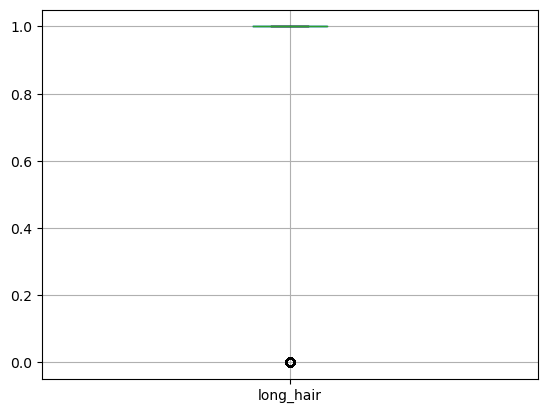

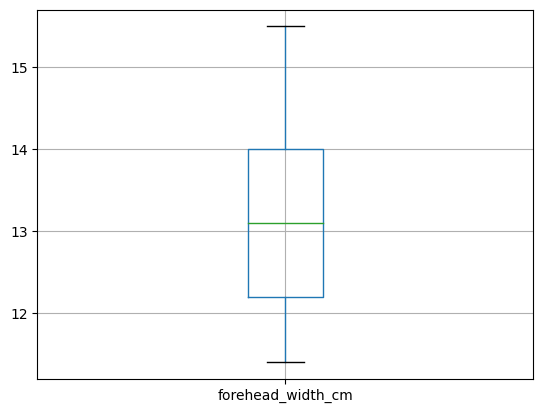

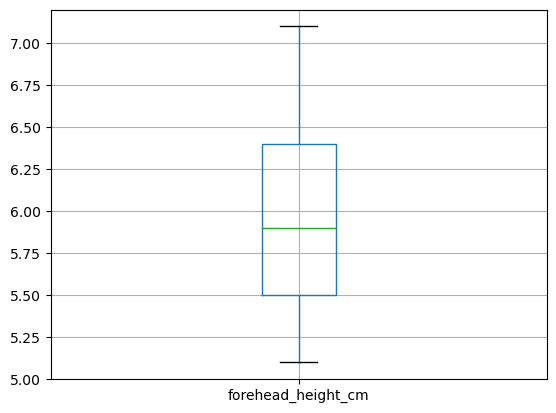

In [6]:
for i in ['long_hair','forehead_width_cm', 'forehead_height_cm']:
    df.boxplot(column=i)
    plt.show()

# Find out outliers

In [7]:
def IQR_values(df,column_name):
    q1=df[column_name].quantile(0.25)
    q2=df[column_name].quantile(0.50)
    q3=df[column_name].quantile(0.75)
    IQR=q3-q1
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    return lower_limit,upper_limit

numerical_features=['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide','nose_long', 'lips_thin', 'distance_nose_to_lip_long']
outlier={}
for column in numerical_features:
    lower_limit,upper_limit=IQR_values(df,column)
    outlier[column]=[lower_limit,upper_limit]
outlier 

{'long_hair': [1.0, 1.0],
 'forehead_width_cm': [9.499999999999998, 16.700000000000003],
 'forehead_height_cm': [4.1499999999999995, 7.750000000000001],
 'nose_wide': [-1.5, 2.5],
 'nose_long': [-1.5, 2.5],
 'lips_thin': [-1.5, 2.5],
 'distance_nose_to_lip_long': [-1.5, 2.5]}

In [8]:
# To find out outier index
outindx=[]
for i in numerical_features:
    df_outl=(df[i]>outlier[i][1])|(df[i]<outlier[i][0])
    x=df.loc[df_outl].index
    outindx.append(x)
outindx

[Int64Index([   1,    2,    3,    7,   10,   12,   15,   23,   24,   38,
             ...
             4907, 4915, 4927, 4934, 4940, 4946, 4947, 4948, 4958, 4965],
            dtype='int64', length=652),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64')]

# Replace outlier with mode

In [9]:
a=['long_hair']
for i in range(len(a)):
    df.loc[outindx[i],a[i]]=df[a[i]].mode()[0]
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,1,14.0,5.4,0,0,1,0,Female
2,1,11.8,6.3,1,1,1,1,Male
3,1,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


# Scaling

In [10]:
df1=df.drop('gender',axis=1)
df1

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,1,14.0,5.4,0,0,1,0
2,1,11.8,6.3,1,1,1,1
3,1,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [12]:
x=scaler.fit_transform(df1)
df2=pd.DataFrame(x,columns=df1.columns)
df2

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,0.0,0.097561,0.50,1.0,0.0,1.0,1.0
1,0.0,0.634146,0.15,0.0,0.0,1.0,0.0
2,0.0,0.097561,0.60,1.0,1.0,1.0,1.0
3,0.0,0.731707,0.50,0.0,1.0,1.0,1.0
4,0.0,0.512195,0.40,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
4996,0.0,0.536585,0.00,0.0,0.0,0.0,0.0
4997,0.0,0.121951,0.15,0.0,0.0,0.0,0.0
4998,0.0,0.365854,0.30,0.0,0.0,0.0,0.0
4999,0.0,0.439024,0.55,0.0,0.0,0.0,0.0


In [13]:
df.update(df2)
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,0.0,0.097561,0.50,1.0,0.0,1.0,1.0,Male
1,0.0,0.634146,0.15,0.0,0.0,1.0,0.0,Female
2,0.0,0.097561,0.60,1.0,1.0,1.0,1.0,Male
3,0.0,0.731707,0.50,0.0,1.0,1.0,1.0,Male
4,0.0,0.512195,0.40,0.0,0.0,0.0,0.0,Female
...,...,...,...,...,...,...,...,...
4996,0.0,0.536585,0.00,0.0,0.0,0.0,0.0,Female
4997,0.0,0.121951,0.15,0.0,0.0,0.0,0.0,Female
4998,0.0,0.365854,0.30,0.0,0.0,0.0,0.0,Female
4999,0.0,0.439024,0.55,0.0,0.0,0.0,0.0,Female


# Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
lenc=LabelEncoder()

In [15]:
a=['gender']
df[a] = df[a].apply(lenc.fit_transform)
df3=df[a]
df3

,gender
0,1
1,0
2,1
3,1
4,0
...,...
4996,0
4997,0
4998,0
4999,0


In [16]:
df.update(df3)
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,0.0,0.097561,0.50,1.0,0.0,1.0,1.0,1
1,0.0,0.634146,0.15,0.0,0.0,1.0,0.0,0
2,0.0,0.097561,0.60,1.0,1.0,1.0,1.0,1
3,0.0,0.731707,0.50,0.0,1.0,1.0,1.0,1
4,0.0,0.512195,0.40,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
4996,0.0,0.536585,0.00,0.0,0.0,0.0,0.0,0
4997,0.0,0.121951,0.15,0.0,0.0,0.0,0.0,0
4998,0.0,0.365854,0.30,0.0,0.0,0.0,0.0,0
4999,0.0,0.439024,0.55,0.0,0.0,0.0,0.0,0


# Logistic Modelling

In [17]:
x = df.drop('gender',axis=1)
y = df['gender']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [19]:
x_train.shape

(4000, 7)

In [20]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(x_train,y_train)

LogisticRegression()

In [21]:
y_pred=logr.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [22]:
lenc.inverse_transform(y_pred)

array(['Male', 'Female', 'Female', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [23]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.97      0.96       502\n           1       0.97      0.95      0.96       499\n\n    accuracy                           0.96      1001\n   macro avg       0.96      0.96      0.96      1001\nweighted avg       0.96      0.96      0.96      1001\n'

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[486,  16],
       [ 23, 476]], dtype=int64)

In [25]:
cm_df=pd.DataFrame(cm,index=['Female','Male'],columns=['Female','Male'])
cm_df

,Female,Male
Female,486,16
Male,23,476


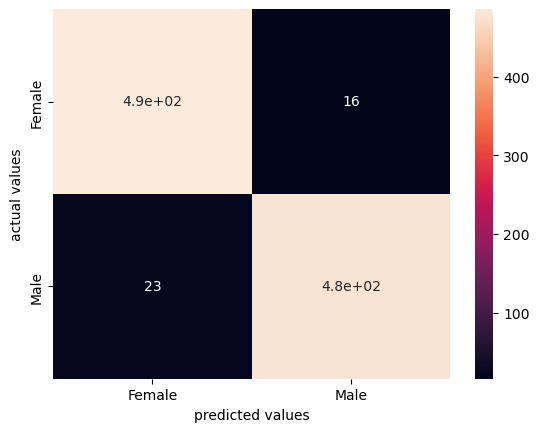

In [26]:
sns.heatmap(cm_df,annot=True)
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.show()

# SVM

In [27]:
from sklearn.svm import SVC
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)

SVC()

In [28]:
svc_pred=svm_radial.predict(x_test)
svc_pred

array([1, 0, 0, ..., 0, 1, 0])

In [29]:
lenc.inverse_transform(svc_pred)

array(['Male', 'Female', 'Female', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [30]:
classification_report(y_test,svc_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.98      0.97       502\n           1       0.98      0.95      0.96       499\n\n    accuracy                           0.97      1001\n   macro avg       0.97      0.96      0.97      1001\nweighted avg       0.97      0.97      0.97      1001\n'

In [31]:
svc_cm=confusion_matrix(y_test,svc_pred)
svc_cm

array([[493,   9],
       [ 26, 473]], dtype=int64)

In [32]:
svc_cm_df=pd.DataFrame(svc_cm,index=['Female','Male'],columns=['Female','Male'])
svc_cm_df

,Female,Male
Female,493,9
Male,26,473


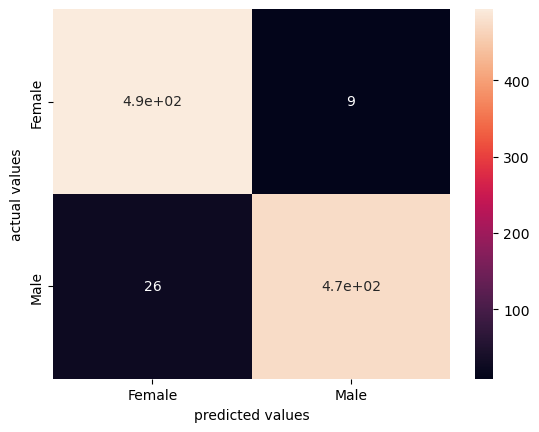

In [33]:
sns.heatmap(svc_cm_df,annot=True)
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.show()

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [35]:
dtc_pred=dtc.predict(x_test)
dtc_pred

array([1, 0, 0, ..., 0, 1, 1])

In [36]:
lenc.inverse_transform(dtc_pred)

array(['Male', 'Female', 'Female', ..., 'Female', 'Male', 'Male'],
      dtype=object)

In [37]:
classification_report(y_test,dtc_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.96       502\n           1       0.96      0.95      0.95       499\n\n    accuracy                           0.96      1001\n   macro avg       0.96      0.96      0.96      1001\nweighted avg       0.96      0.96      0.96      1001\n'

In [38]:
dtc_cm=confusion_matrix(y_test,dtc_pred)
dtc_cm

array([[480,  22],
       [ 23, 476]], dtype=int64)

In [39]:
dtc_df=pd.DataFrame(dtc_cm,index=['Female','Male'],columns=['Female','Male'])
dtc_df

,Female,Male
Female,480,22
Male,23,476


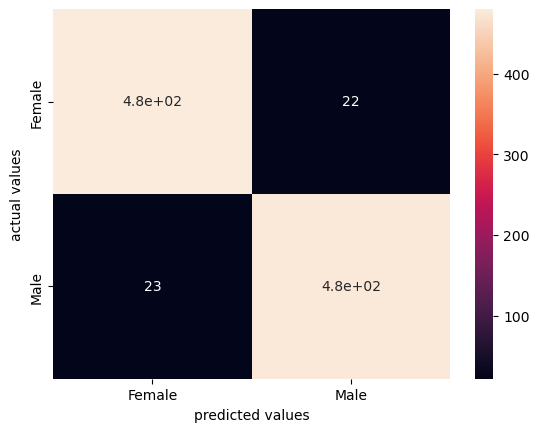

In [40]:
sns.heatmap(dtc_df,annot=True)
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.show()

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='gini')
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
rfc_pred=rfc.predict(x_test)
rfc_pred

array([1, 0, 0, ..., 0, 1, 1])

In [43]:
classification_report(y_test,rfc_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.97      0.96       502\n           1       0.97      0.95      0.96       499\n\n    accuracy                           0.96      1001\n   macro avg       0.96      0.96      0.96      1001\nweighted avg       0.96      0.96      0.96      1001\n'

In [44]:
rfc_cm=confusion_matrix(y_test,rfc_pred)
rfc_cm

array([[488,  14],
       [ 24, 475]], dtype=int64)

In [45]:
rfc_df=pd.DataFrame(rfc_cm,index=['Female','Male'],columns=['Female','Male'])
rfc_df

,Female,Male
Female,488,14
Male,24,475


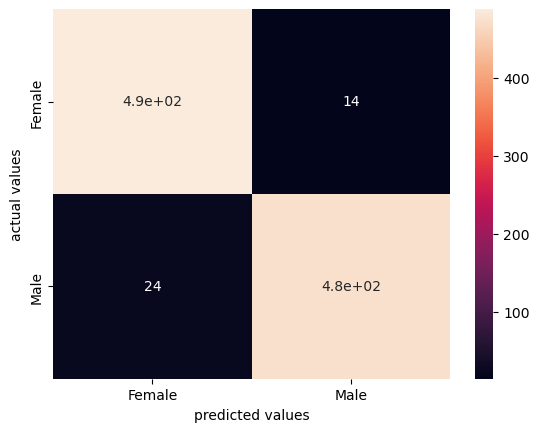

In [46]:
sns.heatmap(rfc_df,annot=True)
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.show()

# Naive Bayes

In [89]:
from sklearn.naive_bayes import GaussianNB

In [90]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred=gnb.predict(x_test)
gnb_pred

array([1, 0, 0, ..., 0, 1, 0])

In [91]:
classification_report(y_test,gnb_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.97      0.97       502\n           1       0.97      0.96      0.96       499\n\n    accuracy                           0.97      1001\n   macro avg       0.97      0.97      0.97      1001\nweighted avg       0.97      0.97      0.97      1001\n'

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,gnb_pred)

0.965034965034965

In [93]:
gnb_cm=confusion_matrix(y_test,gnb_pred)
gnb_cm

array([[488,  14],
       [ 21, 478]], dtype=int64)

In [94]:
gnb_df=pd.DataFrame(gnb_cm,index=['Female','Male'],columns=['Female','Male'])
gnb_df

,Female,Male
Female,488,14
Male,21,478


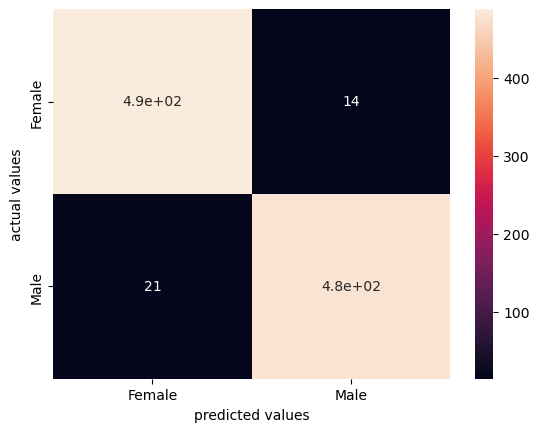

In [95]:
sns.heatmap(gnb_df,annot=True)
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.show()

# KNeighbour Classifier

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
knc=KNeighborsClassifier(n_neighbors=5,metric='manhattan')
knc.fit(x_train,y_train)
knc_pred=knc.predict(x_test)
knc_pred

C:\Users\JOS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 0, ..., 0, 1, 1])

In [102]:
classification_report(y_test,knc_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.97      0.96       502\n           1       0.97      0.94      0.96       499\n\n    accuracy                           0.96      1001\n   macro avg       0.96      0.96      0.96      1001\nweighted avg       0.96      0.96      0.96      1001\n'

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,knc_pred)

0.958041958041958

In [57]:
knc_cm=confusion_matrix(y_test,knc_pred)
knc_cm

array([[491,  11],
       [ 30, 469]], dtype=int64)

In [60]:
knc_df=pd.DataFrame(knc_cm,index=['Female','Male'],columns=['Female','Male'])
knc_df

,Female,Male
Female,491,11
Male,30,469


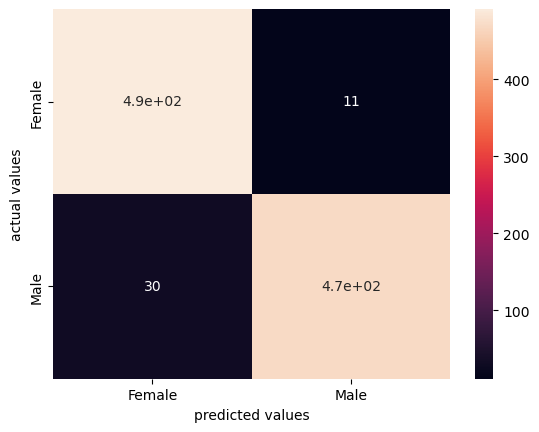

In [61]:
sns.heatmap(knc_df,annot=True)
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.show()